## Predictor-Corrector Methods

https://drive.google.com/file/d/1qxAo7xVEFYduSVNTWtGw_LJEg0cZ5K9K/view?usp=sharing

Given any time and state value, the function, $F(t, S(t))$, returns the change of state $\frac{dS(t)}{dt}$. **Predictor-corrector** methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the $F$ function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.

Essentially, it uses two formulas: the **predictor** and **corrector**. The predictor is an explicit formula and first estimates the solution at $t_{j+1}$, i.e. we can use Euler method or some other methods to finish this step. After we obtain the solution $S(t_{j+1})$, we can apply the corrector to improve the accuracy. Using the found $S(t_{j+1})$ on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution. 

The **midpoint method** has a predictor step:

$$
S\left(t_{j} + \frac{h}{2}\right) = S(t_j) + \frac{h}{2}F(t_j, S(t_j)),
$$

which is the prediction of the solution value halfway between $t_j$ and $t_{j+1}$.

It then computes the corrector step:

$$
S(t_{j+1}) = S(t_j) + hF\left(t_j + \frac{h}{2}, S\left(t_{j} +
\frac{h}{2}\right)\right) $$ 

which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from $S\left(t_{j} + \frac{h}{2}\right)$.

# ODE exercise:

The differential equation $\frac{dy(t)}{dt} = 3t^2 + \sin(t)$ with initial condition $y(0) = 2$.

(a) Find the analytical solutions using sympy.

(b) Approximate the solution to this initial value problem between 0 and 3 in increments of 0.1 and 0.01 using the midpoint method.

(c) Plot the difference between the approximated solutions and the exact solution. 

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the limit for the t axis
b = 3.

# Define function y(t) -> We found this sln with sympy in lecture 103
y_t = lambda t: t**3 - np.cos(t) + 3. # this is y(t)

# Spacing
h_1 = 0.1
h_2 = 1.e-2

# t_axis

t_1 = np.arange(0, b + h_1, h_1)
t_2 = np.arange(0, b + h_2, h_2)

# Initial conditions
y0 = 2.

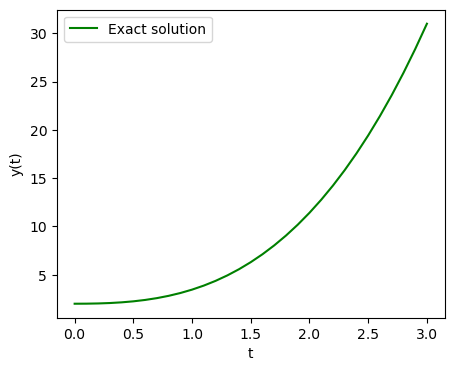

In [3]:
# Plotting

plt.figure(figsize = (5,4))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('y(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

The **midpoint method** has a predictor step:

$$
S\left(t_{j} + \frac{h}{2}\right) = S(t_j) + \frac{h}{2}F(t_j, S(t_j)),
$$

which is the prediction of the solution value halfway between $t_j$ and $t_{j+1}$.

It then computes the corrector step:

$$
S(t_{j+1}) = S(t_j) + hF\left(t_j + \frac{h}{2}, S\left(t_{j} +
\frac{h}{2}\right)\right) $$ 

### Define slope (RHS):

$\frac{dy(t)}{dt} = 3t^2 + \sin(t)$

In [4]:
# Define the slope

def f_ode(t, y):
    """
    Function that returns the slope for the ODE.
    """
    
    return 3*t**2 + np.sin(t)

In [5]:
# Function to calculate midpoint slope

def midpoint(t_axis, h_step):
    
    # Define the y_sln vector
    y_sln = np.zeros(len(t_axis))
    
    # ICS:
    y_sln[0] = y0
    
    # Loop to integrate
    for j in range(0, len(t_axis) - 1):
        
        # Predictor step
        predictor_1  = y_sln[j] + h_step*f_ode(t_axis[j], y_sln[j])/2
        
        # Corrector step
        y_sln[j + 1] = y_sln[j] + h_step*f_ode(t_axis[j] + h_step/2,  predictor_1)
    
    return y_sln

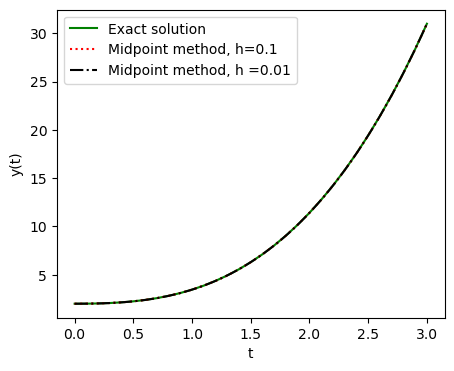

In [6]:
# Plotting

plt.figure(figsize = (5,4))

plt.plot(t_1, y_t(t_1), "g", linestyle = '-', label = "Exact solution")
plt.plot(t_1, midpoint(t_1, h_1), "r", linestyle = ':', label = "Midpoint method, h=0.1")
plt.plot(t_2, midpoint(t_2, h_2), "black", linestyle = '-.', label = "Midpoint method, h =0.01")

plt.xlabel('t')
plt.ylabel('y(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

### Errors:

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_71812/2574762286.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_1, np.log10(np.abs(midpoint(t_1, h_1) - y_t(t_1))), "b", linestyle = '-', label = "Error h=0.1")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_71812/2574762286.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_2, np.log10(np.abs(midpoint(t_2, h_2) - y_t(t_2))), "black", linestyle = '-.', label = "Error h=0.01")


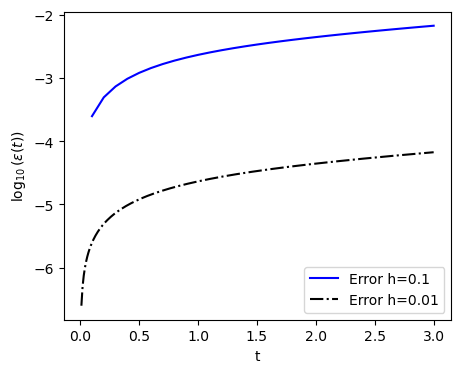

In [7]:
# Plotting

plt.figure(figsize = (5,4))

plt.plot(t_1, np.log10(np.abs(midpoint(t_1, h_1) - y_t(t_1))), "b", linestyle = '-', label = "Error h=0.1")
plt.plot(t_2, np.log10(np.abs(midpoint(t_2, h_2) - y_t(t_2))), "black", linestyle = '-.', label = "Error h=0.01")

plt.xlabel('t')
plt.ylabel(r'$\log_{10}(\epsilon(t))$')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()